In [1]:
# Pair Trading Startegy

The pair trading strategy is based on the idea that two highly correlated stocks may move up and down together, but their relative prices tend to revert to their long-term average. This means that when one stock becomes overvalued compared to the other, the pair trader sells the overvalued stock and buys the undervalued one, anticipating that the prices will eventually converge.

In [9]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# define the list of tickers
tickers = ['RELIANCE.NS', 'SBIN.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'VBL.NS', 'MARUTI.NS', 'TATASTEEL.NS', 'ONGC.NS', 'ITC.NS']

# download historical stock price data from Yahoo Finance
data = yf.download(tickers, period='20d', group_by='ticker')

[*********************100%%**********************]  10 of 10 completed


In [10]:
data

VBL.NS                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2023-12-29  1243.800049  1243.800049  1225.599976  1236.900024  1236.900024   
2024-01-01  1241.800049  1254.000000  1237.000000  1242.500000  1242.500000   
2024-01-02  1250.000000  1250.000000  1232.250000  1236.150024  1236.150024   
2024-01-03  1225.099976  1239.750000  1206.150024  1225.800049  1225.800049   
2024-01-04  1246.000000  1277.400024  1234.000000  1260.000000  1260.000000   
2024-01-05  1260.000000  1283.000000  1244.250000  1279.150024  1279.150024   
2024-01-08  1279.150024  1293.949951  1260.000000  1269.500000  1269.500000   
2024-01-09  1272.800049  1309.949951  1271.050049  1297.550049  1297.550049   
2024-01-10  1297.000000  1304.949951  1260.050049  1268.699951  1268.699951   
2024-01-11  1282.349976  1287.250000  1267.050049  1278.099976  1278.099976   
2024-01-12  1271.099976  1277.949951  1258.500000  1265.050049  1265.050049   
2024-01-15  1276.000000  1280.000000  1261.400024  1271.699951  1271.699951   
2024-01-16  1273.800049  1276.000000  1256.050049  1266.099976  1266.099976   
2024-01-17  1256.000000  1263.599976  1230.099976  1248.500000  1248.500000   
2024-01-18  1244.000000  1249.550049  1196.400024  1230.150024  1230.150024   
2024-01-19  1238.900024  1282.400024  1228.000000  1267.349976  1267.349976   
2024-01-22  1267.349976  1267.349976  1267.349976  1267.349976  1267.349976   
2024-01-23  1261.000000  1279.750000  1243.199951  1271.750000  1271.750000   
2024-01-24  1261.000000  1274.800049  1253.000000  1266.349976  1266.349976   
2024-01-25  1263.550049  1265.000000  1221.000000  1257.400024  1257.400024   

                    TATASTEEL.NS                                      ...  \
             Volume         Open        High         Low       Close  ...   
Date                                                                  ...   
2023-12-29  1149608   138.600006  141.250000  137.149994  139.600006  ...   
2024-01-01   789487   140.000000  140.949997  139.050003  139.850006  ...   
2024-01-02   982195   140.500000  140.600006  137.050003  139.600006  ...   
2024-01-03  1631101   139.500000  139.600006  134.350006  135.350006  ...   
2024-01-04  2387192   136.000000  136.350006  134.000000  134.250000  ...   
2024-01-05  2029763   135.000000  135.949997  132.850006  133.649994  ...   
2024-01-08  1654957   135.300003  135.949997  131.750000  132.000000  ...   
2024-01-09  1773125   133.500000  134.800003  132.500000  133.649994  ...   
2024-01-10  1530973   133.800003  134.699997  132.100006  134.100006  ...   
2024-01-11   923775   134.850006  135.649994  134.199997  134.899994  ...   
2024-01-12  2631987   135.800003  136.250000  134.649994  135.300003  ...   
2024-01-15  1502401   136.000000  136.250000  133.949997  134.899994  ...   
2024-01-16  1320740   134.699997  138.500000  134.000000  137.250000  ...   
2024-01-17  2159125   135.449997  135.750000  131.399994  131.649994  ...   
2024-01-18  1854390   131.649994  132.250000  128.199997  131.000000  ...   
2024-01-19  2841357   132.600006  134.699997  131.600006  134.250000  ...   
2024-01-22        0   134.250000  134.250000  134.250000  134.250000  ...   
2024-01-23  1907173   134.800003  135.199997  129.300003  130.100006  ...   
2024-01-24  3071911   130.199997  135.550003  130.100006  135.149994  ...   
2024-01-25  3331395   136.500000  136.500000  132.000000  133.750000  ...   

               MARUTI.NS                                          SBIN.NS  \
                     Low         Close     Adj Close   Volume        Open   
Date                                                                        
2023-12-29  10273.000000  10302.349609  10302.349609   705227  645.500000   
2024-01-01  10214.650391  10283.299805  10283.299805   411724  642.200012   
2024-01-02  10151.049805  10197.750000  10

Cointegration is a statistical property that two time series possess when they have a long-run equilibrium relationship. In other words, two cointegrated stocks tend to move together in the long run, even though they may deviate from each other in the short run.

To find cointegrated pairs, we will use the coint function from the statsmodels.tsa.stattools module. 

In [11]:
# extract the closing prices
close_prices = pd.DataFrame()
for ticker in tickers:
    close_prices[ticker] = data[ticker]['Close']

In [12]:
# compute the correlation matrix
corr_matrix = close_prices.corr()

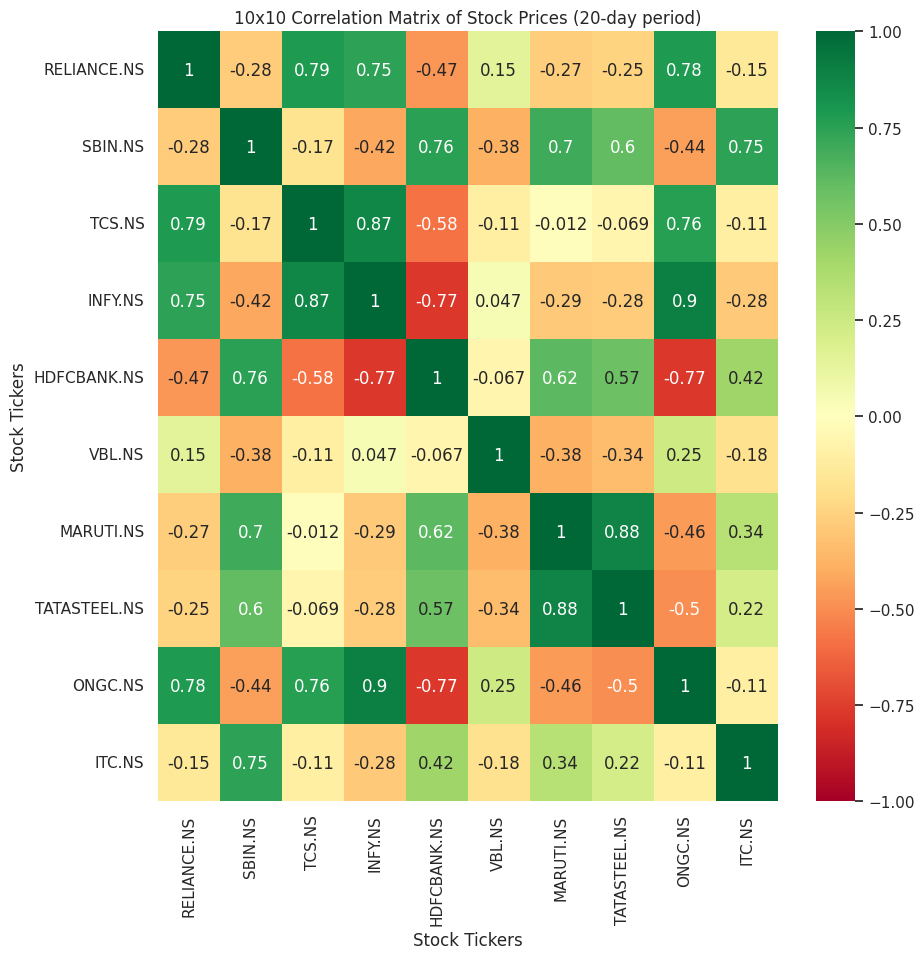

In [13]:
# create a heatmap of the correlation matrix using Seaborn
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)

# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices (20-day period)')

# display the plot
plt.show()

A correlation matrix is a quantitative tool used in finance, statistics, and other fields to measure and visualize the relationships between multiple variables. In the context of stock trading and investing, a correlation matrix is typically used to analyze the relationships between the price movements of different stocks over a specific time period. The correlation coefficient, which ranges from -1 to 1, is used to quantify the strength and direction of the relationship between two stocks.

[*********************100%%**********************]  10 of 10 completed


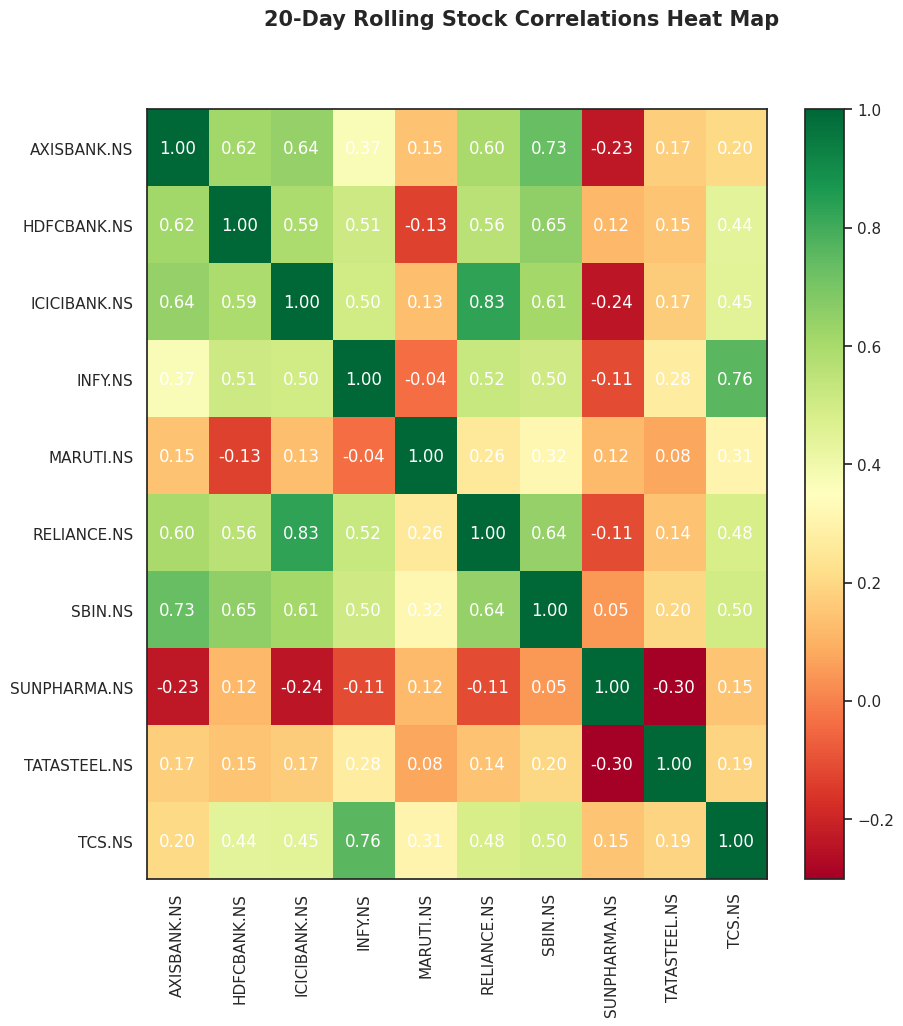

In [16]:
# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of stocks
stocks = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'MARUTI.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS', 'INFY.NS', 'TCS.NS', 'AXISBANK.NS']

# Download stock data using yfinance
data = yf.download(stocks, start='2022-01-01', end='2023-04-06')['Adj Close']

# Compute Percentage Change
rets = data.pct_change()

# Compute 20-day rolling correlation
corr_20_day = rets.rolling(window=20).corr()

# Get the latest correlation matrix
corr_matrix = corr_20_day.iloc[-len(stocks):]

# Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='RdYlGn', interpolation='none', aspect='auto')

# Add annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='w')

plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.suptitle('20-Day Rolling Stock Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()


In [17]:
# Import required libraries
import yfinance as yf
import pandas as pd

# Define the list of stocks
stocks = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'MARUTI.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS', 'INFY.NS', 'TCS.NS', 'AXISBANK.NS']

# Download stock data using yfinance
data = yf.download(stocks, start='2022-01-01', end='2023-04-06')['Adj Close']

# Compute Percentage Change
rets = data.pct_change()

# Compute 20-day rolling correlation
corr_20_day = rets.rolling(window=20).corr()

# Get the latest correlation matrix
corr_matrix = corr_20_day.iloc[-len(stocks):]

# Display the correlation matrix
print(corr_matrix)

[*********************100%%**********************]  10 of 10 completed


                         AXISBANK.NS  HDFCBANK.NS  ICICIBANK.NS   INFY.NS  \
Date                                                                        
2023-04-05 AXISBANK.NS      1.000000     0.618102      0.641157  0.366599   
           HDFCBANK.NS      0.618102     1.000000      0.591801  0.509468   
           ICICIBANK.NS     0.641157     0.591801      1.000000  0.497499   
           INFY.NS          0.366599     0.509468      0.497499  1.000000   
           MARUTI.NS        0.145423    -0.133879      0.132794 -0.039129   
           RELIANCE.NS      0.603017     0.562601      0.829131  0.522194   
           SBIN.NS          0.733753     0.651073      0.609226  0.502777   
           SUNPHARMA.NS    -0.231205     0.118821     -0.235956 -0.111159   
           TATASTEEL.NS     0.172223     0.148220      0.170705  0.276566   
           TCS.NS           0.203008     0.444362      0.447144  0.759938   

                         MARUTI.NS  RELIANCE.NS   SBIN.NS  SUNPHARMA.NS  \


## How Correlation Matrix is Useful for Traders/Investors

- Diversification: Traders can use the correlation matrix to identify stocks that are weakly correlated or negatively correlated, thereby helping them to diversify their portfolio. By investing in stocks that do not move in the same direction, traders can potentially reduce the overall risk of their portfolio.

- Risk management: Correlation analysis can help traders identify and manage risk by highlighting stocks that tend to move together. By understanding these relationships, traders can adjust their positions and hedge against potential losses.

- Trading strategies: Traders can use the correlation matrix to develop and validate trading strategies. For example, pairs trading involves taking long and short positions in two highly correlated stocks, expecting that the spread between their prices will converge or diverge. By identifying such pairs, traders can potentially profit from temporary price discrepancies.

- Market sentiment analysis: The correlation matrix can also provide insights into market sentiment. For instance, if most stocks in a sector or market are highly correlated, it may indicate that they are all being influenced by a common factor, such as broad market trends, economic conditions, or geopolitical events. This information can help traders make informed decisions about their investments.